In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib Anatomy

<img src="https://miro.medium.com/max/419/0*4YHR28Wt4LWg77e3.png"></img>

[]

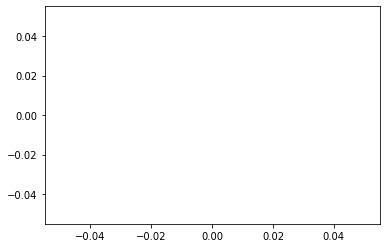

In [ ]:
plt.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f64588a0e50>,
      dtype=object)

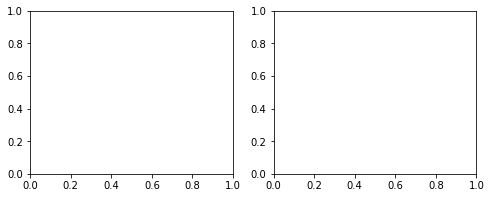

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(8,3)) #ncols,nrows,figsize=(width,height)
axes

In [ ]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f64588a0e50>,
      dtype=object)

In [ ]:
fig.plot()

AttributeError: ignored

In [ ]:
axes.plot()

In [ ]:
type(axes[0])

In [ ]:
axes[1].plot()

In [ ]:
data = pd.read_csv('sales_data_sample_Data_Visualisasi.csv',encoding='Latin-1')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
data['CITY'].unique()

# Bar Chart

**When to use**:
- Comparing parts of a bigger set of data, highlighting different categories, or showing change over time.
- Have long categories label — it offers more space.
- If you want to illustrate both positive and negative values in the dataset.

**When to avoid**:
- If you’re using multiple data points.
- If you have many categories, avoid overloading your graph. Your graph shouldn’t have more than 10 bars.

In [ ]:
data['STATUS'].value_counts()

In [ ]:
data['STATUS'].value_counts().plot(kind='bar')

In [ ]:
data['CITY'].value_counts().plot(kind='bar',figsize=(20,3))

In [ ]:
data['STATUS'].value_counts().plot(kind='bar')
plt.text(x=-0.2,y=2619,s=2617)
plt.text(x=0.9,y=61,s=60)

In [ ]:
data['STATUS'].value_counts().plot(kind='barh')

In [ ]:
data.groupby('STATUS').sum()[['QUANTITYORDERED','ORDERLINENUMBER']].plot(kind='bar')

In [ ]:
data.groupby(['STATUS','COUNTRY']).count()['ORDERNUMBER'].plot(kind='bar')

In [ ]:
status_freq = data['STATUS'].value_counts()
sns.barplot(x=status_freq.index,y=status_freq,orient='v')

In [ ]:
sns.barplot(x=status_freq,y=status_freq.index,orient='h')

In [ ]:
status_freq_multi = data[(data['COUNTRY'] == 'Spain') | (data['COUNTRY'] == 'Sweden')].groupby(['STATUS','COUNTRY']).count()['ORDERNUMBER'].reset_index()
sns.barplot(x=status_freq_multi['STATUS'],y=status_freq_multi['ORDERNUMBER'],orient='v',hue=status_freq_multi['COUNTRY'])

In [ ]:
status_freq_multi

In [ ]:
status_freq_multi = data.groupby(['STATUS','COUNTRY']).count()['ORDERNUMBER'].reset_index()
sns.barplot(data=status_freq_multi,x='COUNTRY',y='ORDERNUMBER',orient='v',hue='STATUS')

# Pie Chart
**When to use**:
- When you show relative proportions and percentages of a whole dataset.
- Best used with small datasets — also applies to donut charts.
- When comparing the effect of ONE factor on different categories.
- If you have up to 6 categories.
- When your data is nominal and not ordinal.

**When to avoid**:
- If you have a big dataset.
- If you want to make a precise or absolute comparison between values.

In [ ]:
data['COUNTRY'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

In [ ]:
data['STATUS'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')

# Line Chart

**When to use**:
- If you have a continuous dataset that changes over time.
- If your dataset is too big for a bar chart.
- If you want to display multiple series for the same timeline.
- If you want to visualize trends instead of exact values.

**When to avoid**:
- Line charts work better with bigger datasets, so, if you have a small one, use a bar chart instead.

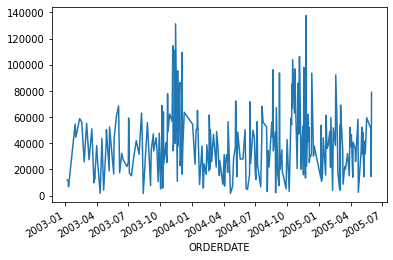

In [ ]:
data['ORDERDATE'] = data['ORDERDATE'].astype('datetime64[ns]')

sorted_data = data.sort_values(by='ORDERDATE',ascending=True).groupby('ORDERDATE').sum()

fig, axes = plt.subplots()
sorted_data['SALES'].plot(kind='line',ax=axes)

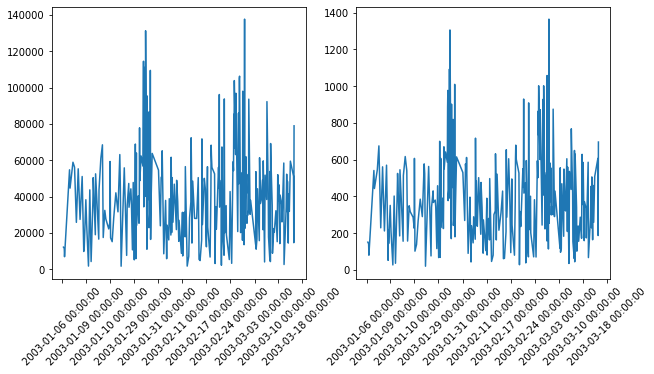

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
axes[0].plot(sorted_data.index,sorted_data['SALES'])
axes[1].plot(sorted_data.index,sorted_data['QUANTITYORDERED'])
#plt.xticks(rotation=45)
axes[0].set_xticklabels(sorted_data.index,rotation=45)
axes[1].set_xticklabels(sorted_data.index,rotation=45)
#axes[0].set_ylim(100,10000)
plt.show()

In [ ]:
sorted_data.index

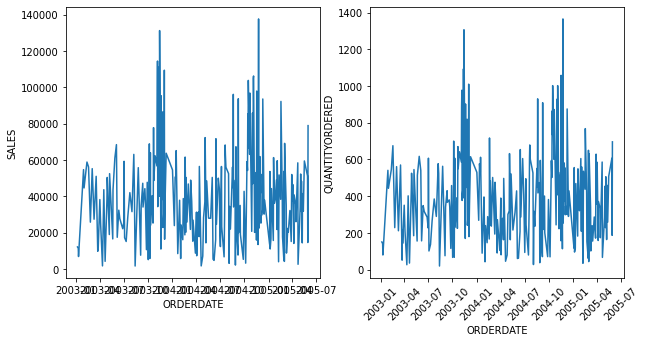

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.lineplot(x=sorted_data.index,y=sorted_data['SALES'],ax=axes[0])
sns.lineplot(x=sorted_data.index,y=sorted_data['QUANTITYORDERED'],ax=axes[1])
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Jumlah Produk yang Terjual Harian')

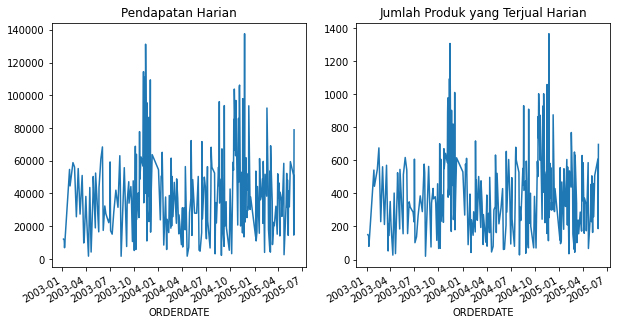

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sorted_data['SALES'].plot(ax=axes[0])
sorted_data['QUANTITYORDERED'].plot(ax=axes[1])
axes[0].set_title('Pendapatan Harian')
axes[1].set_title('Jumlah Produk yang Terjual Harian')

In [ ]:
sns.lineplot(x=sorted_data.index,y=sorted_data['QUANTITYORDERED'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
sorted_data

# Scatter Plot
**When to use**:
- To show correlation and clustering in big datasets.
- If your dataset contains points that have a pair of values.
- If the order of points in the dataset is not essential.

**When to avoid**:
- If you have a small dataset.
- If the values in your dataset are not correlated.

Text(0.5, 1.0, 'Relationship between Quantity Ordered and Sales')

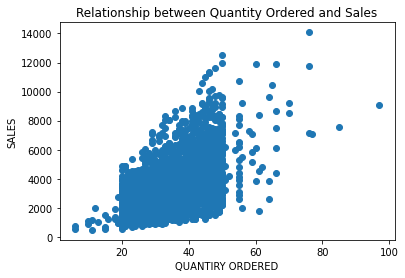

In [ ]:
fig,axes = plt.subplots()
axes.scatter(data['QUANTITYORDERED'],data['SALES'])
axes.set_xlabel('QUANTIRY ORDERED')
axes.set_ylabel('SALES')
axes.set_title('Relationship between Quantity Ordered and Sales')

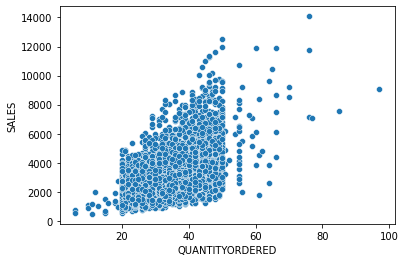

In [ ]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES')

# Bubble Plot
**When to use**:
- If you want to compare independent values.
- If you want to show distribution or relation.
**When to avoid**:
- If you have a small dataset.

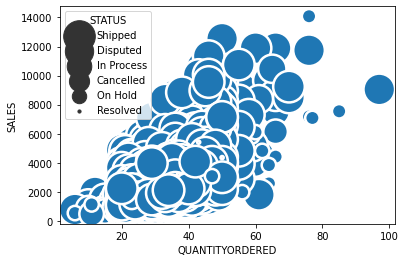

In [ ]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES',size='STATUS',sizes=(10,1000))

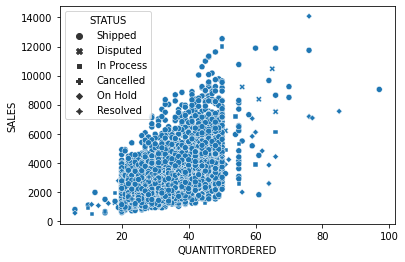

In [ ]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES',style='STATUS')

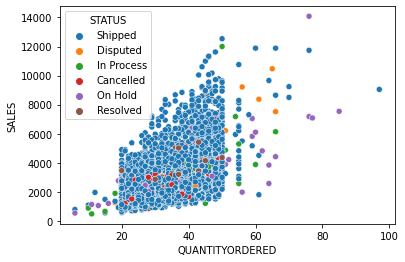

In [ ]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES',hue='STATUS')

# Area Plot
**When to use**:
- If you want to show part-to-whole relations.
- If you want to portray the volume of your data and not just the relation to time.
**When to avoid**:
- It can’t be used with discrete data.

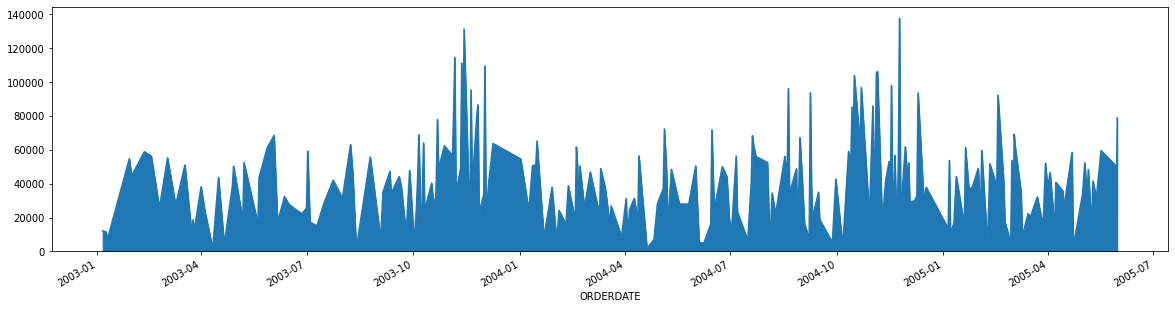

In [ ]:
sorted_data['SALES'].plot(kind='area',figsize=(20,5))

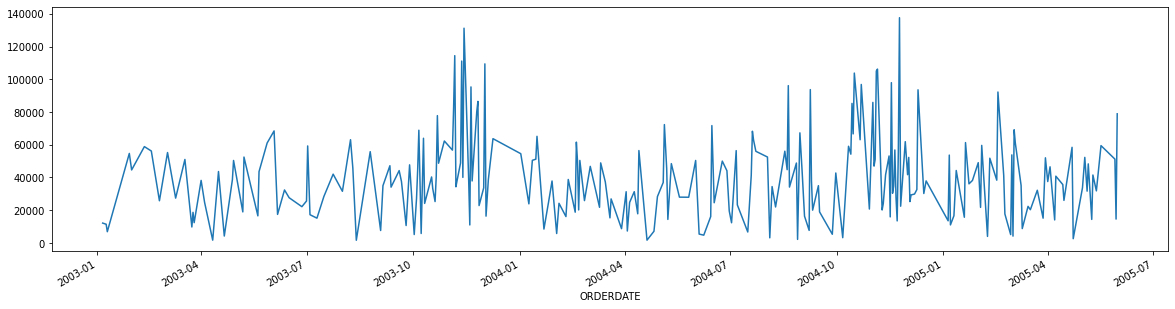

In [ ]:
sorted_data['SALES'].plot(figsize=(20,5))

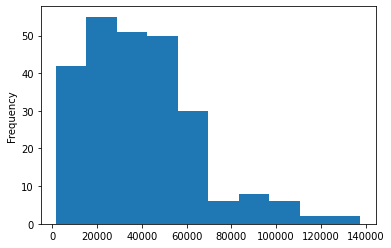

In [ ]:
sorted_data['SALES'].plot(kind='hist')